In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,5)

In [4]:
data = pd.read_csv("results.csv")
data.head()

TEST               MAP  50000  100000  150000  200000  250000  \
0         int_insert   "std::map<int>"     73      51      52      55      57   
1    int_succ_lookup   "std::map<int>"     17      17      17      17      18   
2  int_nosucc_lookup   "std::map<int>"    165     262     388     437     601   
3         int_delete   "std::map<int>"     43      46      59      56      59   
4         int_insert   "std::map<int>"     52      51      52      55      57   

   300000  350000  400000  ...  9000000  10000000  15000000  20000000  \
0      60      64      75  ...      242       270       250       252   
1      20      20      25  ...       70        73        73        72   
2      64     779      77  ...      246       279       256       251   
3      56      77      62  ...      127       130       136       133   
4      57      64      71  ...      242       254       253       253   

   25000000  30000000  35000000  40000000  45000000  50000000  
0       253       298       293       307       313       322  
1        73        75        77        79        84        82  
2       252       278       283       282       298       289  
3       134       149       155       165       170       165  
4       250       274       284       282       291       287  

[5 rows x 33 columns]

In [5]:
groups_mean = data.groupby(["TEST", "MAP"]).mean()
groups_mean

50000  \
TEST                 MAP                                                  
int_delete            "robin_hood::unordered_flat<int>"        9.066667   
                      "robin_hood::unordered_node<int>"       10.700000   
                      "robinhoodflat"                         34.000000   
                      "robinhoodnode                          43.500000   
                      "std::map<int>"                         44.233333   
                      "std::unordered_map"                   141.500000   
int_insert            "robin_hood::unordered_flat<int>"       24.333333   
                      "robin_hood::unordered_node<int>"       28.500000   
                      "robinhoodflat"                        107.000000   
                      "robinhoodnode                         120.250000   
                      "std::map<int>"                         52.733333   
                      "std::unordered_map"                   222.500000   
int_nosucc_lookup     "robin_hood::unordered_flat<int>"       58.366667   
                      "robin_hood::unordered_node<int>"       71.600000   
                      "robinhoodflat"                        239.750000   
                      "robinhoodnode                         285.750000   
                      "std::map<int>"                         97.333333   
                      "std::unordered_map"                   409.250000   
int_succ_lookup       "robin_hood::unordered_flat<int>"       10.566667   
                      "robin_hood::unordered_node<int>"       14.300000   
                      "robinhoodflat"                         37.500000   
                      "robinhoodnode                          37.750000   
                      "std::map<int>"                         16.733333   
                      "std::unordered_map"                    88.750000   
string_delete         "robin_hood::unordered_flat<string>"    25.233333   
                      "robin_hood::unordered_node<string>"    18.100000   
                      "robinhoodflat"                        146.250000   
                      "robinhoodnode"                         78.750000   
                      "std::map<string>"                      63.300000   
                      "std::unordered_map"                   200.250000   
string_insert         "robin_hood::unordered_flat<string>"    82.833333   
                      "robin_hood::unordered_node<string>"    57.500000   
                      "robinhoodflat"                        705.500000   
                      "robinhoodnode"                        318.750000   
                      "std::map<string>"                      92.000000   
                      "std::unordered_map"                   423.750000   
string_nosucc_lookup  "robin_hood::unordered_flat<string>"   188.700000   
                      "robin_hood::unordered_node<string>"   120.033333   
                      "robinhoodflat"                       1251.750000   
                      "robinhoodnode"                        397.500000   
                      "std::map<string>"                     141.133333   
                      "std::unordered_map"                   410.000000   
string_succ_lookup    "robin_hood::unordered_flat<string>"    25.933333   
                      "robin_hood::unordered_node<string>"    30.933333   
                      "robinhoodflat"                         77.500000   
                      "robinhoodnode"                         73.000000   
                      "std::map<string>"                      48.866667   
                      "std::unordered_map"                   136.500000   

                                                                 100000  \
TEST                 MAP                                                  
int_delete            "robin_hood::unordered_flat<int>"        9.233333   
                      "robin_hood::unordered_node<int>"       11.200000   
               

In [6]:
groups_std = data.groupby(["TEST", "MAP"]).std()

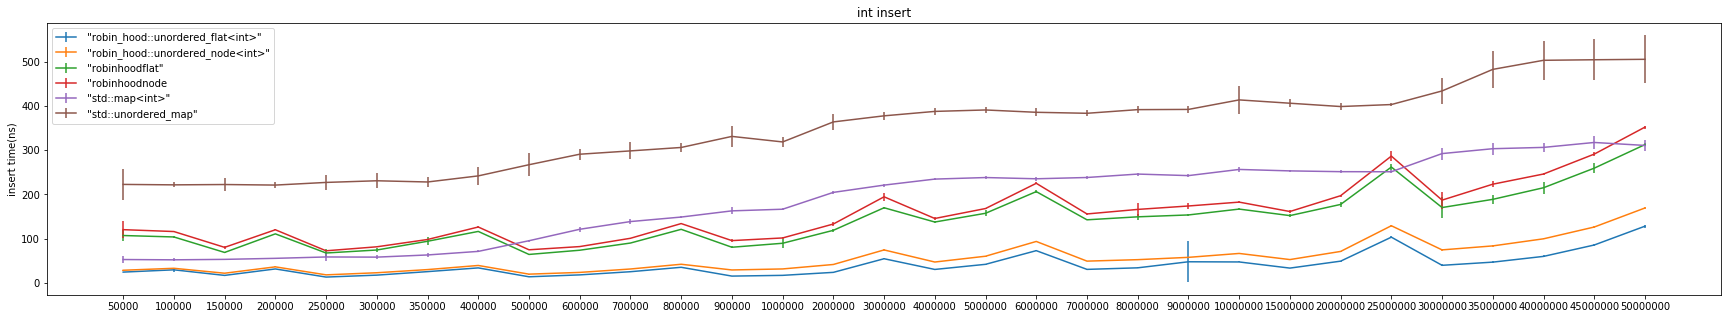

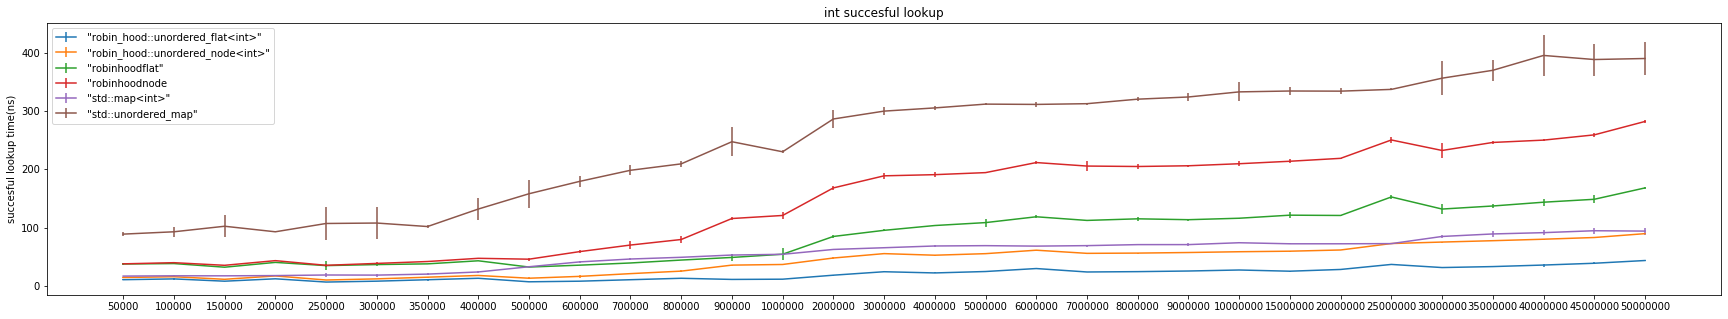

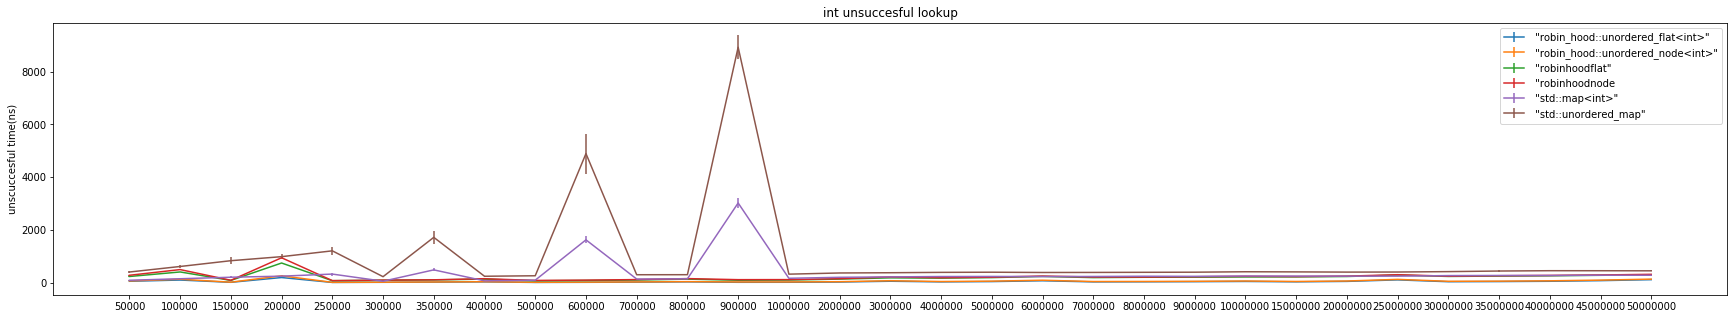

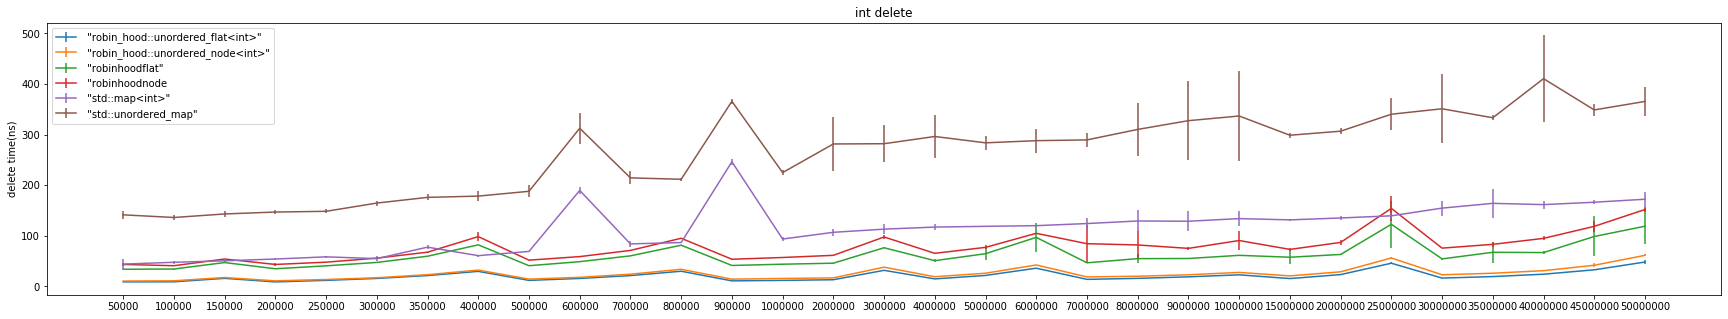

In [7]:
for i in groups_mean.loc["int_insert"].index:
#     plt.plot(groups_mean.loc["int_insert", i], label=i)
    plt.errorbar(groups_mean.columns,groups_mean.loc["int_insert", i], yerr=groups_std.loc["int_insert", i], label=i)
plt.ylabel('insert time(ns)')
plt.legend()
plt.title("int insert")
# plt.xscale("log")
plt.show()
for i in groups_mean.loc["int_insert"].index:
#     plt.plot(groups_mean.loc["int_succ_lookup", i], label=i)
    plt.errorbar(groups_mean.columns,groups_mean.loc["int_succ_lookup", i], yerr=groups_std.loc["int_succ_lookup", i], label=i)
plt.ylabel('succesful lookup time(ns)')
plt.legend()
plt.title("int succesful lookup")
# plt.xscale("log")
plt.show()
for i in groups_mean.loc["int_insert"].index:
#     plt.plot(groups_mean.loc["int_succ_lookup", i], label=i)
    plt.errorbar(groups_mean.columns,groups_mean.loc["int_nosucc_lookup", i], yerr=groups_std.loc["int_nosucc_lookup", i], label=i)
plt.ylabel('unscuccesful time(ns)')
plt.legend()
plt.title("int unsuccesful lookup")
# plt.xscale("log")
plt.show()
for i in groups_mean.loc["int_insert"].index:
#     plt.plot(groups_mean.loc["int_succ_lookup", i], label=i)
    plt.errorbar(groups_mean.columns,groups_mean.loc["int_delete", i], yerr=groups_std.loc["int_delete", i], label=i)
plt.ylabel('delete time(ns)')
plt.legend()
plt.title("int delete")
# plt.xscale("log")
plt.show()

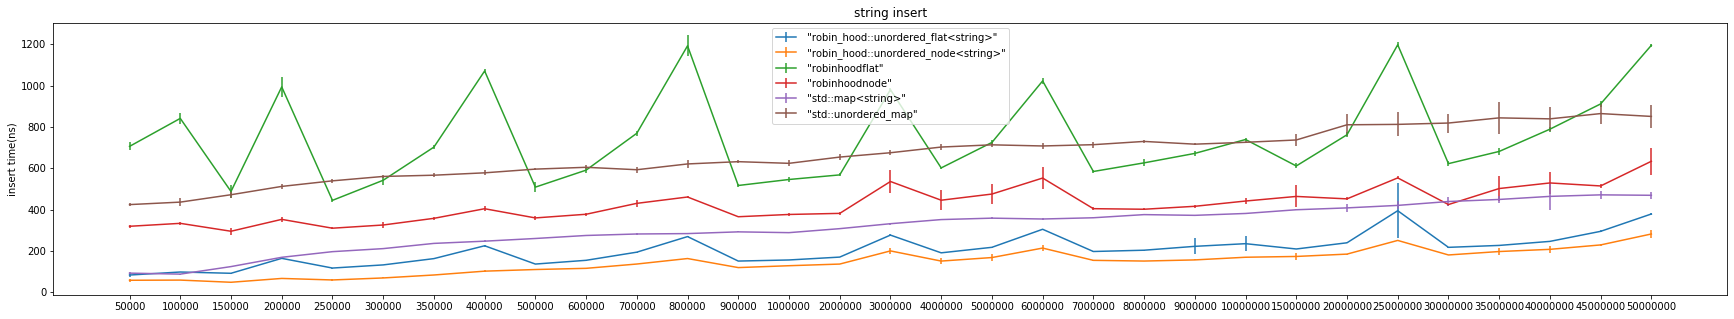

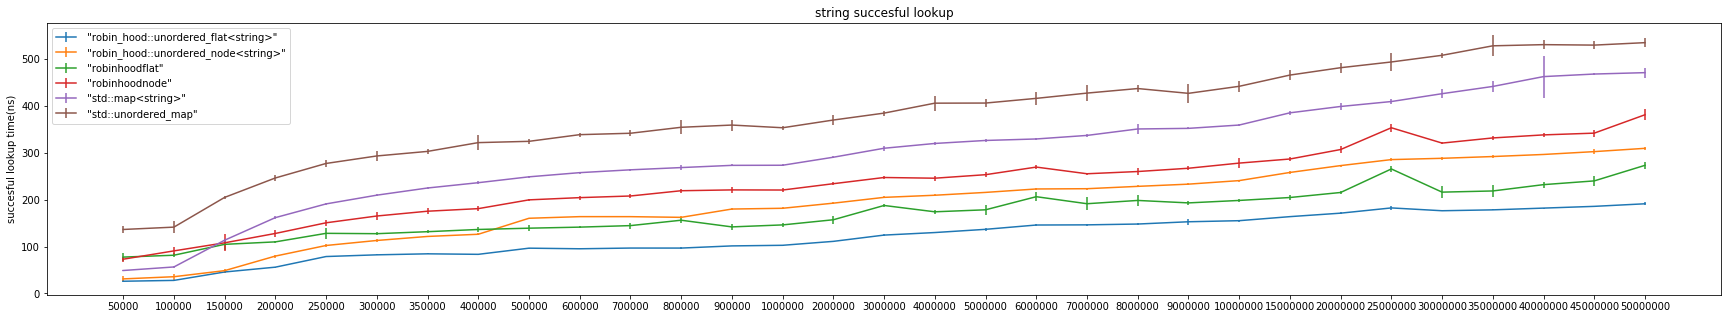

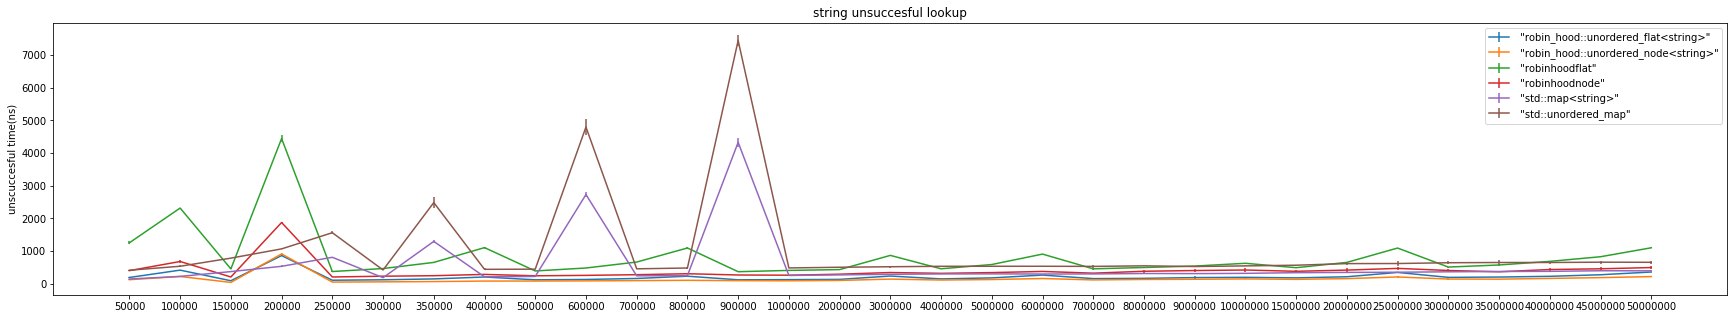

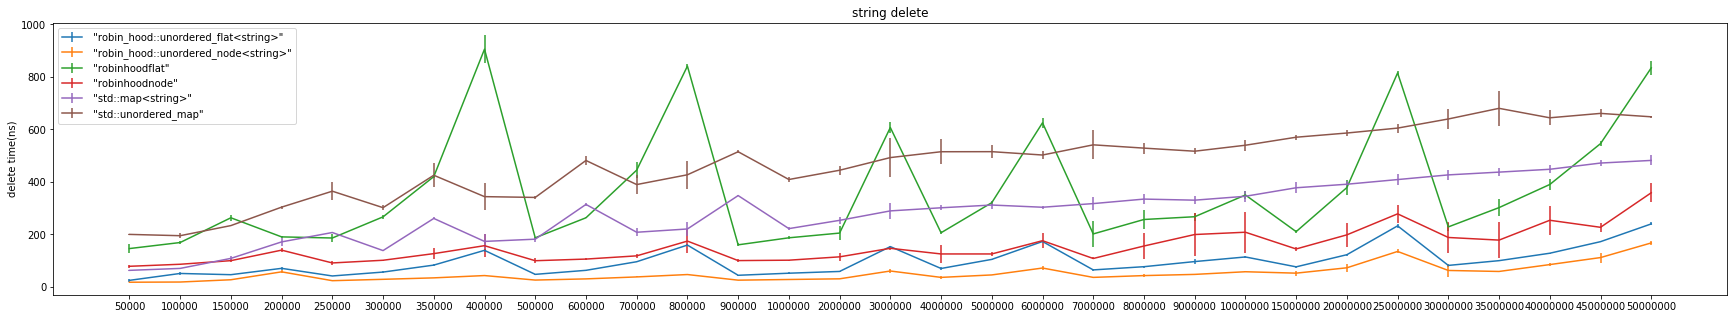

In [8]:
for i in groups_mean.loc["string_insert"].index:
#     plt.plot(groups_mean.loc["string_insert", i], label=i)
    plt.errorbar(groups_mean.columns,groups_mean.loc["string_insert", i], yerr=groups_std.loc["string_insert", i], label=i)
plt.ylabel('insert time(ns)')
plt.legend()
plt.title("string insert")
# plt.xscale("log")
plt.show()


for i in groups_mean.loc["string_insert"].index:
#     plt.plot(groups_mean.loc["string_succ_lookup", i], label=i)
    plt.errorbar(groups_mean.columns,groups_mean.loc["string_succ_lookup", i], yerr=groups_std.loc["string_succ_lookup", i], label=i)
plt.ylabel('succesful lookup time(ns)')
plt.legend()
plt.title("string succesful lookup")
# plt.xscale("log")
plt.show()

for i in groups_mean.loc["string_insert"].index:
#     plt.plot(groups_mean.loc["string_succ_lookup", i], label=i)
    plt.errorbar(groups_mean.columns,groups_mean.loc["string_nosucc_lookup", i], yerr=groups_std.loc["string_nosucc_lookup", i], label=i)
plt.ylabel('unscuccesful time(ns)')
plt.legend()
plt.title("string unsuccesful lookup")
# plt.xscale("log")
plt.show()
for i in groups_mean.loc["string_insert"].index:
#     plt.plot(groups_mean.loc["string_succ_lookup", i], label=i)
    plt.errorbar(groups_mean.columns,groups_mean.loc["string_delete", i], yerr=groups_std.loc["string_delete", i], label=i)
plt.ylabel('delete time(ns)')
plt.legend()
plt.title("string delete")
# plt.xscale("log")
plt.show()